## Import

In [21]:
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

## 데이터 불러오기
- preprocessing15.csv : 15년2월 - 16년4월 (apart, pps)
- PreprocessingPeriodApartName.csv : 16년2월 - 16년 4월  (apart, pps)
- 2-4월이 겹치는데 2개를 불러온 이유 : 2-4월에 거래가 안된 아파트가 데이터가 존재,
    컬럼명이 아파트명인가 컬럼값이 아파트명인가의 차이 

In [22]:
data = pd.read_csv("../Data/preprocessingData/K_20200419_preprocessing08_16.csv",encoding='CP949')
apartName = pd.read_csv("../Data/preprocessingData/K_20200414_PreprocessingPeriodApartName.csv",encoding='CP949')

In [23]:
data.tail()
apartName.tail()

,Apart,pps
20922,한신2,502
20923,한신2,451
20924,한신2,540
20925,한영(101),319
20926,한영(104),330


## 데이터 널값 처리 
- 데이터의 원할한 처리를 위한 null값 처리를 위해 전열과 후열의 값을 채워넣는 방향으로 처리

In [24]:
data=data.fillna(method='pad')

In [25]:
data=data.fillna(method='bfill')

## 아파트 시계열데이터 인덱스 및 유일값 설정

In [26]:
data = data.set_index('date')

In [27]:
data = data[apartName['Apart'].unique()]

In [28]:
data.head()

,개포2차현대아파트(220),개포6차우성아파트1동~8동,개포우성3차,개포자이(12-2),개포주공 1단지,개포주공 3단지,개포주공 4단지,개포주공 5단지,개포주공 6단지,개포주공 7단지,...,화성두산아파트,동구햇살아파트101동,미영리치타운,미영리치타운103,범양프레체,중화동건영아파트,청원다미소,태능에셈빌,한영(101),한영(104)
date,,,,,,,,,,,,,,,,,,,,,
200802,1029.0,1113.0,982.0,1139.0,2034,2115.0,1953,1267.0,1330.0,1250.0,...,446.0,357.0,354.0,356.0,674.0,310.0,325.0,328.0,283.0,280.0
200803,1029.0,1113.0,982.0,1139.0,2054,2109.0,1785,1286.0,1259.0,1218.0,...,463.0,357.0,354.0,356.0,674.0,310.0,343.0,295.0,283.0,280.0
200804,1029.0,1113.0,982.0,1132.0,1969,2055.0,1904,1280.0,1303.0,894.0,...,468.0,317.0,401.0,356.0,674.0,273.0,343.0,295.0,283.0,280.0
200805,1029.0,1013.0,982.0,1132.0,1931,1937.0,1810,1254.0,1234.0,1219.0,...,508.0,365.0,401.0,342.0,674.0,354.0,343.0,377.0,283.0,280.0
200806,1029.0,1013.0,982.0,1132.0,1731,1815.0,1603,1262.0,1184.0,1169.0,...,504.0,365.0,401.0,360.0,674.0,354.0,343.0,354.0,283.0,280.0


## 개별 수익률 계산

In [29]:
log_data = np.log(data/data.shift(1))
log_data.head()

,개포2차현대아파트(220),개포6차우성아파트1동~8동,개포우성3차,개포자이(12-2),개포주공 1단지,개포주공 3단지,개포주공 4단지,개포주공 5단지,개포주공 6단지,개포주공 7단지,...,화성두산아파트,동구햇살아파트101동,미영리치타운,미영리치타운103,범양프레체,중화동건영아파트,청원다미소,태능에셈빌,한영(101),한영(104)
date,,,,,,,,,,,,,,,,,,,,,
200802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200803,0.0,0.000000,0.0,0.000000,0.009785,-0.002841,-0.089948,0.014885,-0.054861,-0.025933,...,0.037408,0.000000,0.000000,0.000000,0.0,0.000000,0.053905,-0.106038,0.0,0.0
200804,0.0,0.000000,0.0,-0.006165,-0.042263,-0.025938,0.064539,-0.004677,0.034352,-0.309260,...,0.010741,-0.118834,0.124665,0.000000,0.0,-0.127101,0.000000,0.000000,0.0,0.0
200805,0.0,-0.094143,0.0,0.000000,-0.019488,-0.059135,-0.050630,-0.020522,-0.054408,0.310080,...,0.082013,0.140996,0.000000,-0.040120,0.0,0.259825,0.000000,0.245270,0.0,0.0
200806,0.0,0.000000,0.0,0.000000,-0.109339,-0.065055,-0.121450,0.006359,-0.041362,-0.041882,...,-0.007905,0.000000,0.000000,0.051293,0.0,0.000000,0.000000,-0.062948,0.0,0.0


In [30]:
log_data = log_data.dropna() 
log_data.head()

,개포2차현대아파트(220),개포6차우성아파트1동~8동,개포우성3차,개포자이(12-2),개포주공 1단지,개포주공 3단지,개포주공 4단지,개포주공 5단지,개포주공 6단지,개포주공 7단지,...,화성두산아파트,동구햇살아파트101동,미영리치타운,미영리치타운103,범양프레체,중화동건영아파트,청원다미소,태능에셈빌,한영(101),한영(104)
date,,,,,,,,,,,,,,,,,,,,,
200803,0.0,0.000000,0.0,0.000000,0.009785,-0.002841,-0.089948,0.014885,-0.054861,-0.025933,...,0.037408,0.000000,0.000000,0.000000,0.0,0.000000,0.053905,-0.106038,0.0,0.0
200804,0.0,0.000000,0.0,-0.006165,-0.042263,-0.025938,0.064539,-0.004677,0.034352,-0.309260,...,0.010741,-0.118834,0.124665,0.000000,0.0,-0.127101,0.000000,0.000000,0.0,0.0
200805,0.0,-0.094143,0.0,0.000000,-0.019488,-0.059135,-0.050630,-0.020522,-0.054408,0.310080,...,0.082013,0.140996,0.000000,-0.040120,0.0,0.259825,0.000000,0.245270,0.0,0.0
200806,0.0,0.000000,0.0,0.000000,-0.109339,-0.065055,-0.121450,0.006359,-0.041362,-0.041882,...,-0.007905,0.000000,0.000000,0.051293,0.0,0.000000,0.000000,-0.062948,0.0,0.0
200807,0.0,0.000000,0.0,0.000000,0.039087,0.000000,0.028898,-1.350493,-0.047566,0.017805,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


## 아파트별 평균수익률 계산

In [31]:
mu = log_data.mean() 
mu

개포2차현대아파트(220)   -0.001220
개포6차우성아파트1동~8동   -0.000345
개포우성3차           -0.000414
개포자이(12-2)       -0.002563
개포주공 1단지         -0.000198
                    ...   
중화동건영아파트          0.002369
청원다미소             0.002144
태능에셈빌             0.002425
한영(101)           0.001222
한영(104)           0.001677
Length: 3568, dtype: float64

In [32]:
mu_year = log_data.mean()*13
expect=pd.DataFrame(mu_year)
expect=expect.rename({0:'expect'},axis='columns')
expect

,expect
개포2차현대아파트(220),-0.015866
개포6차우성아파트1동~8동,-0.004485
개포우성3차,-0.005376
개포자이(12-2),-0.033321
개포주공 1단지,-0.002568
...,...
중화동건영아파트,0.030793
청원다미소,0.027875
태능에셈빌,0.031528
한영(101),0.015884


## 평균 위험도 계산

In [33]:
risk=log_data.std() * np.sqrt(13)
risk = pd.DataFrame(risk)
risk=risk.rename({0:'risk'},axis='columns')

In [34]:
er=pd.concat([expect,risk],axis=1)
er

,expect,risk
개포2차현대아파트(220),-0.015866,0.100273
개포6차우성아파트1동~8동,-0.004485,0.626664
개포우성3차,-0.005376,0.236432
개포자이(12-2),-0.033321,0.198218
개포주공 1단지,-0.002568,0.195403
...,...,...
중화동건영아파트,0.030793,0.135651
청원다미소,0.027875,0.149245
태능에셈빌,0.031528,0.203782
한영(101),0.015884,0.100596


In [35]:
apartName['pps']=pd.to_numeric(apartName['pps'])
apart = apartName.groupby(apartName['Apart']).mean()

In [36]:
per=pd.concat([apart,er],axis=1)
per

,pps,expect,risk
(1101-1),792.250000,-0.004092,0.116463
(145-0),734.000000,0.007421,0.128327
(191-8)중앙궁전빌라트,366.000000,-0.002513,0.223421
(23-42),363.000000,0.054335,0.110515
(323-4),468.000000,0.037408,0.080316
...,...,...,...
힐타워,541.000000,0.069242,0.176896
힐탑,366.000000,0.017817,0.248307
힐탑아파트3차(894-3),293.000000,-0.004889,0.226194
힐탑트레져1동,1252.666667,0.065221,0.193200


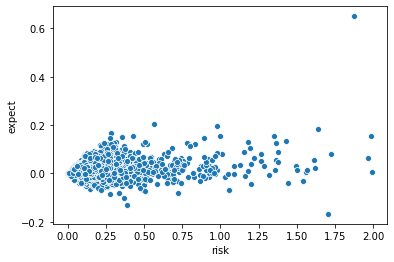

In [37]:
sns.scatterplot(x="risk",y='expect',data=per)

In [38]:
per_plus = per[per['expect']>0]
per_plus

,pps,expect,risk
(145-0),734.000000,0.007421,0.128327
(23-42),363.000000,0.054335,0.110515
(323-4),468.000000,0.037408,0.080316
(6-19),746.000000,0.005075,0.076306
(740-25),329.000000,0.074235,0.194463
...,...,...,...
힐스테이트 상도 센트럴파크,827.461538,0.022847,0.108301
힐스테이트 상도 프레스티지,773.428571,0.010788,0.139104
힐타워,541.000000,0.069242,0.176896
힐탑,366.000000,0.017817,0.248307


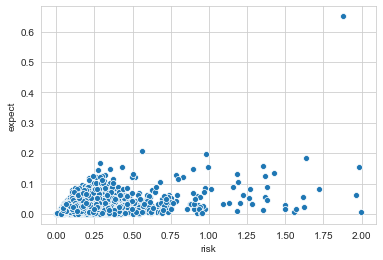

In [39]:
sns.set_style('whitegrid')
sns.scatterplot(x="risk",y='expect',data=per_plus)

## 이상치 제거

In [40]:
per_plus[per_plus['expect']>0.5]

,pps,expect,risk
로얄하이츠,674.0,0.650503,1.876694


In [41]:
per_plus[per_plus['expect']>0.5].index.to_list()

['로얄하이츠']

In [42]:
per_plus=per_plus.drop("로얄하이츠",axis = 0)

In [43]:
sns.set_style('whitegrid')
sns.lmplot(x="risk",y='expect',data=per_plus,scatter_kws ={'s':3})
ymean = per_plus['risk'].mean()
xmean = per_plus["expect"].mean()

x = plt.gca().axes.get_xlim()
y = plt.gca().axes.get_ylim()

plt.plot(x, len(x)*[xmean], sns.xkcd_rgb["pale red"])
plt.plot(len(y) * [ymean],y, sns.xkcd_rgb["pale red"])
plt.show()

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

## 고수익 자산 선정
- 상위 5개 아파트 선정

In [44]:
display(per_plus.sort_values(by='expect',ascending=False).head())
first_per = per_plus.sort_values(by='expect',ascending=False).head()
first_per["class"]=1
first_per
# first_list =p er_plus[per_plus["expect"]>1.4].index.to_list()



,pps,expect,risk
원남,588.000000,0.206467,0.563966
구산,775.500000,0.196277,0.980847
한양3,943.833333,0.182452,1.637816
동평화패션타운,543.000000,0.168898,0.283898
한일,1047.500000,0.156760,1.352157


,pps,expect,risk,class
원남,588.000000,0.206467,0.563966,1
구산,775.500000,0.196277,0.980847,1
한양3,943.833333,0.182452,1.637816,1
동평화패션타운,543.000000,0.168898,0.283898,1
한일,1047.500000,0.156760,1.352157,1


## 저위험중 수익률이 높은 자산 선정
- 위험률이 평균보다 작은 자산 중 상위 5개 아파트 선정

In [45]:
per_plus['expect']=round(per_plus['expect'],7)
display(per_plus[per_plus["risk"]<per_plus["risk"].mean()].sort_values(by='expect' ,ascending=False).head(5))
# second_list = per_plus[per_plus["risk"]<per_plus["risk"].mean()].sort_values(by='expect' ,ascending=False).head(5).index.to_list()
second_per = per_plus[per_plus["risk"]<per_plus["risk"].mean()].sort_values(by='expect' ,ascending=False).head(5)
second_per["class"]=2
second_per


,pps,expect,risk
새진6차,511.0,0.125769,0.239621
뉴타운B동,653.0,0.116663,0.213435
대광아파트,396.0,0.111395,0.214407
그린피아,733.0,0.096551,0.228778
상암월드컵파크9단지,696.5,0.094071,0.169027


,pps,expect,risk,class
새진6차,511.0,0.125769,0.239621,2
뉴타운B동,653.0,0.116663,0.213435,2
대광아파트,396.0,0.111395,0.214407,2
그린피아,733.0,0.096551,0.228778,2
상암월드컵파크9단지,696.5,0.094071,0.169027,2


### 한글폰트 추가

In [46]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 수익률 상위 5개와 위험도를 고려한 수익률 상위 5개의 흐름

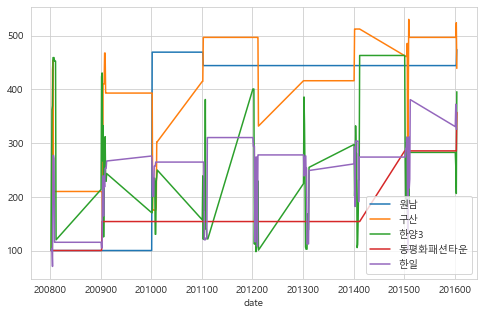

In [47]:
data_top5=data[first_per.index.to_list()]
(data_top5 / data_top5.iloc[0] * 100).plot(figsize=(8, 5), grid=True)
plt.show()


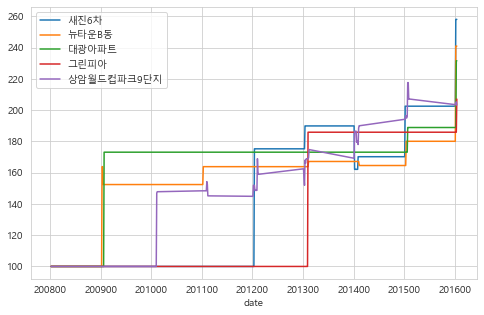

In [48]:
data_tail5=data[second_per.index.to_list()]
(data_tail5 / data_tail5.iloc[0] * 100).plot(figsize=(8, 5), grid=True)
plt.show()


In [49]:
sum_per = pd.concat([first_per,second_per])
sum_per

,pps,expect,risk,class
원남,588.000000,0.206467,0.563966,1
구산,775.500000,0.196277,0.980847,1
한양3,943.833333,0.182452,1.637816,1
동평화패션타운,543.000000,0.168898,0.283898,1
한일,1047.500000,0.156760,1.352157,1
새진6차,511.000000,0.125769,0.239621,2
뉴타운B동,653.000000,0.116663,0.213435,2
대광아파트,396.000000,0.111395,0.214407,2
그린피아,733.000000,0.096551,0.228778,2
상암월드컵파크9단지,696.500000,0.094071,0.169027,2


In [50]:
sum_list = sum_per.index.to_list()
sum_list

['원남',
 '구산',
 '한양3',
 '동평화패션타운',
 '한일',
 '새진6차',
 '뉴타운B동',
 '대광아파트',
 '그린피아',
 '상암월드컵파크9단지']

### 10개의 상관관계 보기

In [51]:
data[sum_list].corr()

,원남,구산,한양3,동평화패션타운,한일,새진6차,뉴타운B동,대광아파트,그린피아,상암월드컵파크9단지
원남,1.000000,0.442876,-0.360343,0.435456,0.351930,0.502392,0.669432,0.783901,0.364865,0.680778
구산,0.442876,1.000000,-0.152534,0.352726,0.379143,0.457862,0.585396,0.562652,0.390476,0.643702
한양3,-0.360343,-0.152534,1.000000,-0.035382,-0.005001,-0.162115,-0.270871,-0.352135,0.047711,-0.149497
동평화패션타운,0.435456,0.352726,-0.035382,1.000000,0.431253,0.692302,0.740092,0.607582,0.671842,0.713345
한일,0.351930,0.379143,-0.005001,0.431253,1.000000,0.327052,0.492537,0.484382,0.348947,0.364732
새진6차,0.502392,0.457862,-0.162115,0.692302,0.327052,1.000000,0.675322,0.544553,0.709720,0.841002
뉴타운B동,0.669432,0.585396,-0.270871,0.740092,0.492537,0.675322,1.000000,0.843382,0.526812,0.714918
대광아파트,0.783901,0.562652,-0.352135,0.607582,0.484382,0.544553,0.843382,1.000000,0.411144,0.646458
그린피아,0.364865,0.390476,0.047711,0.671842,0.348947,0.709720,0.526812,0.411144,1.000000,0.779019
상암월드컵파크9단지,0.680778,0.643702,-0.149497,0.713345,0.364732,0.841002,0.714918,0.646458,0.779019,1.000000


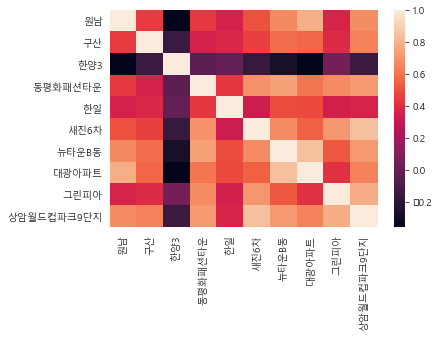

In [52]:
sns.heatmap(data[sum_list].corr())
plt.show()

## 상관관계가 작은 2개 아파트 선정

In [53]:
first_list = first_per.index.to_list()
second_list = second_per.index.to_list()
minCorr=1
A=""
B=""
for i in first_list:
    for j in second_list:
        Corr1 = data[[i,j]].corr().iloc[0,1]
        if Corr1<minCorr:
            minCorr=Corr1
            A=i
            B=j
print(A)
print(B)
print(minCorr)


한양3
대광아파트
-0.35213507340075206


In [54]:
choise = sum_per.loc[[A,B]]
choise

,pps,expect,risk,class
한양3,943.833333,0.182452,1.637816,1
대광아파트,396.000000,0.111395,0.214407,2


## 포트폴리오 평균 기대값과 평균 위험율


In [55]:
W1 = choise.iloc[0,0]/(choise.iloc[0,0]+choise.iloc[1,0])
W2 = choise.iloc[1,0]/(choise.iloc[0,0]+choise.iloc[1,0])

exp = W1*choise.iloc[0,1]+W2*choise.iloc[1,1]
exp

0.16145037487079933

In [56]:
ri1 = choise.iloc[0,2]
ri2 = choise.iloc[1,2]

ris = (W1**2)*(ri1**2)+(W2**2)*(ri2**2)+2*W1*W2*minCorr*ri1*ri2
ris

1.2836508432603664

## 포트폴리오 기대 수익률 계산(만원)

In [57]:
(choise.iloc[0,0]+choise.iloc[1,0])*exp

216.31659393105932

#### 주식에서 포트폴리오는 자산의 비중을 상관관계에 따라 어느정도로 분산할 것인지를 결정해야한다. 
#### 이에 절적한 자산 분배를 찾아보기로 했다. 

In [58]:
 weights = np.random.random(2)
 weights

array([0.67532769, 0.96871975])

In [59]:
np.sum(weights)

1.6440474432127101

In [77]:
prets = []
pvols = []
for i in range (500):
    weights = np.random.random(10)
    weights /= np.sum(weights)
    prets.append(np.sum(log_data[sum_list].mean() * weights) * 13)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(log_data[sum_list].cov() * 13, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

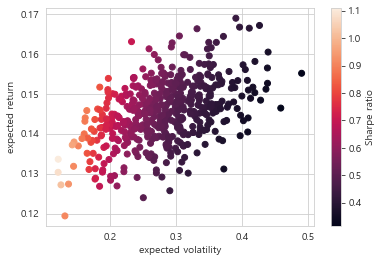

In [78]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [91]:
prets = []
pvols = []
for i in range (10000):
    weights = np.random.random(10)
    weights /= np.sum(weights)
    prets.append(np.sum(log_data[sum_list].mean() * weights) * 13)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(log_data[sum_list].cov() * 13, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

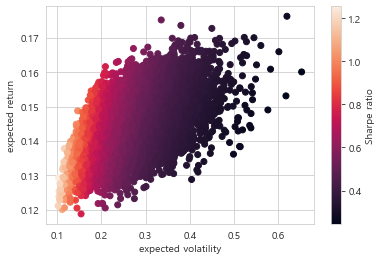

In [92]:
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()